# Week 4 - MinHash

TODO:
- Replace mmh3 with built-in `hash()` function.
- Exercise 1: Jaccard index
- Exercise 2: Extract all kmers -> call `jaccard()`
- Exercise 3: Extract minhash sketch -> call `jaccard()`
- Exercise 4: Extract minimiser sketch (alphabetical smallest - sort) -> call `jaccard()`
    - If have time, make students use 
        1. Order function: Lexicographic (alphabetically Smallest)
        2. Order function: Smallest hash value (not biased).  
- Exercise 5: Speed / correctness tradeoff with minhash sketches / minimizer sketches. 

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

Working with sets, minhash, and comparing sequences.

</div>

## Setup

**Week 4 packages**

This week we will use: 
- biopython 
- ~~mmh3~~


**Week 4 data**

This week we will be comparing entire bacterial genomes for similarity using MinHash. <br>
The 4 genomes we will use are in the `./data` folder within `week4/`.


## Working with Sets

In Python sets are an unordered collection of unique elements. Sets are similar to lists and tuples, but unlike lists and tuples, sets cannot contain duplicate values. 

We can use sets for tasks that involve handling unique items, such as removing duplicates from a list or testing membership in a collection.

In [ ]:
# Create sets in Python
empty_set = set()
my_set = {1, 2, 3, 4, 5}

In [ ]:
# Convert a list to a set
set([1,1,2,3,4,4,])

Adding and Removing Elements:

You can add elements to a set using the add() method and remove elements using the remove() or discard() methods.

Note: discard() does not raise an error if if the element is not found

In [ ]:
my_set.add(6)
my_set.remove(3)
print(my_set)

In [ ]:
# Membership Testing: You can test if an element is in a set using the in keyword.
if 2 in my_set:
    print("2 is in the set")

In [ ]:
# You can get the number of elements in a set using the len() function.
len(my_set)

### Set Operations:

Sets support various operations such as union, intersection, difference, and symmetric difference.

Union (|): Combines two sets and returns a new set with all unique elements.

In [ ]:
set1 = {1, 2, 3}
set2 = {3, 4, 5}
union_set = set1 | set2
print(union_set)

If using python <= 3.9, you will have to use the 'union()' function, rather than the '|' operator.
 
You can use .union(), .intersection(), .difference(), and .symmetric_difference() instead of '|', '&', '-' and '^'. 

In [ ]:
set1 = {1, 2, 3}
set2 = {3, 4, 5}
union_set = set1.union(set2)
print(union_set)

Intersection (&): Returns a new set containing elements that are in both sets.

In [ ]:
intersection_set = set1 & set2
print(intersection_set)

Difference (-): Returns a new set with elements from the first set that are not in the second set.

Also called the "exclusion"

In [ ]:
# In set1 and not in set2
difference_set = set1 - set2
print(difference_set)

Symmetric Difference (^): Returns a new set with elements that are in either of the sets but not in both.

In [ ]:
# Unique to either set, not shared
symmetric_difference_set = set1 ^ set2
print(symmetric_difference_set)

## Exercise 1: True Jaccard Distance

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

<b>Challange:</b> Calculate jaccard for kmer sets. The Jaccard distance is the `intersection / union`.
    
- Input: Two kmer sets
- Output: Jaccard dist of the sets
    
</div>

In [ ]:
def jaccard(a: set, b: set) -> float:
    # YOUR CODE HERE 
    raise NotImplementedError


In [ ]:
set1 = set([1, 2, 3, 4, 5])
set2 = set([4, 5, 6, 7, 8])
print(jaccard(set1, set2))    # should equal 0.25

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

<b>Challange:</b> Write a function that returns a set of all unique kmers in a sequence. 
    
- Input: 
    - A DNA string or Seq object
    - kmer len `k`
- Extract kmers from the input seq
- Output: Return set of all kmers
    
</div>

In [ ]:
def extract_kmers(seq: str, k: int) -> set:
    """
    Extracts all kmers & returns as set.
    """
    # YOUR CODE HERE 
    raise NotImplementedError


In [ ]:
seq = 'AGTACGGT'
print(extract_kmers(seq, 4)) # should equal {'CGGT', 'ACGG', 'TACG', 'GTAC', 'AGTA'}

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
    
<b>Challange:</b> Combine the above functions to return jaccard index for two sequences and a kmer size k
    
</div>


In [ ]:
def true_jaccard_distance(seqA: str, seqB: str, k: int) -> float:
    # YOUR CODE HERE 
    raise NotImplementedError


In [ ]:
# identical
seqA = 'AGTACGGTCAGTAGTCGC'
seqB = 'AGTACGGTCAGTAGTCGC'
j = true_jaccard_distance(seqA, seqB, 4)
print(f'identical sequences true jaccard: {j:.2f}')   # should equal 1.0

# single mismatch 
seqA = 'AGTACGGTAAGTAGTCGC'
seqB = 'AGTACGGTTAGTAGTCGC'
j = true_jaccard_distance(seqA, seqB, 4)
print(f'single mismatch true jaccard: {j:.2f}')       # should equal 0.59

# single indel
seqA = 'AGTACGGTAAAGTAGTCGC'
seqB = 'AGTACGGTAAGTAGTCGC'
j = true_jaccard_distance(seqA, seqB, 4) 
print(f'single indel jaccard: {j:.2f}')               # should equal 0.81


## Exercise 2: MinHash sketches

In exercise 1 we compared kmer similarity between two sequences by calculating a ***true*** jaccard index.  <br>
All kmers from each sequences were used. This can be time consuming if doing many comparisons.

To reduce runtime, we can create a 'MinHash sketch', which acts as a kmer 'fingerprint' of a sequence. <br>
By comparing these sketches (which are tiny in comparison), rather than the full kmer sets, we can ***estimate*** the jaccard index in a fraction of the time. 

We will consider that two sequences may be reverse complemented relative to one another, so will use canonical kmers. 
Remember that a canonical kmer is the lexicographically smaller of the two orientations of a kmer. 


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

<b>Challange:</b> Write a function that returns a Minhash Sketch of a DNA sequence. The sketch should be a set containing the bottom `s` hash values of kmers extracted from the input sequence`.

- Input: 
    - A DNA string
    - kmer len `k`
    - the number of min. hash values `s` to store in the sketch 
- Output: Return a set of the smallest `s` hash values

Process:
- Extract canonical kmers from the input seq
- Calculate hash values
- Pick the smallest `s` values and return as a set. 
    
</div>

In [ ]:
# Some helper functions for calculating a hash value from a canonical kmer
import mmh3 

def get_canon(kmer: str) -> str:
    complement_dict = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    rev = kmer[::-1]
    revcomp = ''.join([complement_dict[base] for base in rev])
    if kmer <= revcomp:
        return kmer
    else:
        return revcomp

# Hash canonical kmer 
def dna_hash(kmer: str) -> int:
    hashval = mmh3.hash64(str(kmer), seed=42, signed=False)[0]
    return hashval

In [ ]:
def minhash_sketch(seq: str, k: int, s: int) -> set:
    """
    Calulate minhash sketch from DNA sequence.
    """
    # YOUR CODE HERE 
    raise NotImplementedError

In [ ]:
# First 100 bases of our first SeqRecord
seq = 'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC'
minhash_sketch(seq, k=5, s=10)

## Exercise 3: MinHash Jaccard Distance

Genomes that share kmers also share kmer hash values, and therefore may have similar MinHash sketches. <br>
We can rapidly ***estimate*** the distance of two sequences by calculating the jaccard distance using MinHash sketches as input.

Remember these distances are estimates only, as we've taken a kmer sample from both sequences.

Using our minhash_sketch() function from earlier, let's test it on two identical sequences.

In [ ]:
# identical sequences: prove that minhash works & jaccard would be 1
seqA = 'AGTACGGTAGATGCGTTGTGCATGACTGATGCTAGAGTCTGCTACGTAGCGACAGCTTGCAGTCATGC'
seqB = 'AGTACGGTAGATGCGTTGTGCATGACTGATGCTAGAGTCTGCTACGTAGCGACAGCTTGCAGTCATGC'

sketchA = minhash_sketch(seqA, 4, 8)
print(f'sketchA: {sketchA}')

sketchB = minhash_sketch(seqB, 4, 8)
print(f'sketchB: {sketchB}')

In [ ]:
# We can check these are the same using an assert statement
assert sketchA == sketchB

Now lets make the sequences slightly different

In [ ]:
# Different sequences: show that most min 8 hash values match
seqA = 'AGTACGGTACATCCGTTGGGC'
seqB = 'AGTACGGTACATGCGTTGC'

sketchA = minhash_sketch(seqA, 4, 8)
sketchB = minhash_sketch(seqB, 4, 8)

if sketchA != sketchB:
    print('sketches not same!')
    
print(f'sketchA: {sketchA}')
print(f'sketchB: {sketchB}')

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<b>Challange:</b> Calculate the Jaccard distance between two Minhash sketches (Minhash distance)
    
- Input: 
    - Two sets DNA seqs
    - kmer len k
    - Number of minimizers m
- Calculate minhash sketch for each input seq
- Return: Jaccard distance between the two minhash sketches
</div>

In [ ]:
def minhash_jaccard_distance(seqA: str, seqB: str, k: int, s: int) -> float:
    # YOUR CODE HERE 
    raise NotImplementedError

In [ ]:
# identical sequences 
print('IDENTICAL')
seqA = 'AGTACGGTACATGCGTTGC'
seqB = 'AGTACGGTACATGCGTTGC'
jt = true_jaccard_distance(seqA, seqB, k=4)
jm = minhash_jaccard_distance(seqA, seqB, k=4, s=10)
print(f'True Jaccard for identical sequences: {jt:.2f}')       # should equal 1.00
print(f'MinHash Jaccard for identical sequences: {jm:.2f}')    # should approximate 1.00
print()

# different sequences: 
# - prove minhash is approximation of jaccard
# - students will all get different values for minhash jaccard based on hash seed
# - compare with each other - jm should all be approximating 0.77
# - run a few times to show different random samples due to hash seed
print('DIFFERENT')
seqA = 'AGTACGGTAGATGCGTTGTGCATGACTGATGCTAGAGTCTGCTACGTAGCGACAGCTTGCAGTCATGC'
seqB = 'AGTACGGTACATGCGTTGTGCACGACTGATGCTAGAGTCTGCTACGTAGCGACAGCTTGCAAGTCATGC'
jt = true_jaccard_distance(seqA, seqB, k=4)
jm = minhash_jaccard_distance(seqA, seqB, k=4, s=10)
print(f'True Jaccard for different sequences: {jt:.2f}')      # should equal 0.77
print(f'MinHash Jaccard for different sequences: {jm:.2f}')   # should approximate 0.77

## Speed and accuracy comparison

Here we demonstrate the speed improvement and accuracy tradeoff when using MinHash. 

Load bacterial genomes from file using BioPython.

In [ ]:
# load bacterial genomes
import gzip
from Bio import SeqIO

genome_filepaths = [
    'data/NC_000913.fasta.gz',
    'data/NC_002695.fasta.gz',
    'data/NC_003197.fasta.gz',
    'data/NC_021870.fasta.gz',
]
genomes = []
for filepath in genome_filepaths:
    with gzip.open(filepath, "rt") as fp:
        seq = next(SeqIO.parse(fp, "fasta"))
    genomes.append(seq)



NC_000913.3
NC_002695.2
NC_003197.2
NC_021870.1


Calculate ***true*** jaccard distance (using all kmers). 
Only using the first 1Mb of a given genome. 

In [ ]:
seqA = genomes[0].seq[:1000000]
seqB = genomes[1].seq[:1000000]
print('true jaccard index: ', true_jaccard_distance(seqA, seqB, k=10))

The cell above should take a few seconds - half a minute to run. 

This is pretty slow if we want to do many comparisons. <br>
Let's instead extract MinHash sketches, then compare sketches instead. 

Extract sketches (a few seconds - half a minute to run)

In [ ]:
sketch_A = minhash_sketch(genomes[0].seq[:1000000], 10, 100)
sketch_B = minhash_sketch(genomes[1].seq[:1000000], 10, 100)

After sketches have been created, comparisons will now take negligible time. <br>
Below we will calculate the jaccard index 100 times to illustrate. It should still run almost instantly. 

Note that the ***estimated*** jaccard index is very similar to the true jaccard index. 

In [ ]:
for i in range(100):
    jaccard(set(sketch_A), set(sketch_B))

print('estimated jaccard index: ', jaccard(set(sketch_A), set(sketch_B)))

From this example we see that the estimated jaccard index is close to the true value. <br> 
MinHash can provide an efficiency boost while maintaining decent accuracy. <br>
MinHash (and other fingerprinting approaches) can be applied when doing one-to-many or many-to-many comparisons. 

## Extension challenges

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<b>Challange:</b> Calculate pairwise minhash distances for our 4 bacterial genomes. 

~~Visualise distances with an MDS plot.~~
TODO: create pandas dataframe and populate with distance values (est. jaccard).
    
Which samples are most similar?
    
Hint: Check the seqrecord descriptions for species names.
</div>

             NC_000913.3  NC_002695.2  NC_003197.2  NC_021870.1
NC_000913.3            0            0          0.5            0
NC_002695.2            0            0          0.0            0
NC_003197.2            0            0          0.0            0
NC_021870.1            0            0          0.0            0


/tmp/ipykernel_7876/3083026947.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc['NC_000913.3', 'NC_003197.2'] = 0.5


<Axes: >

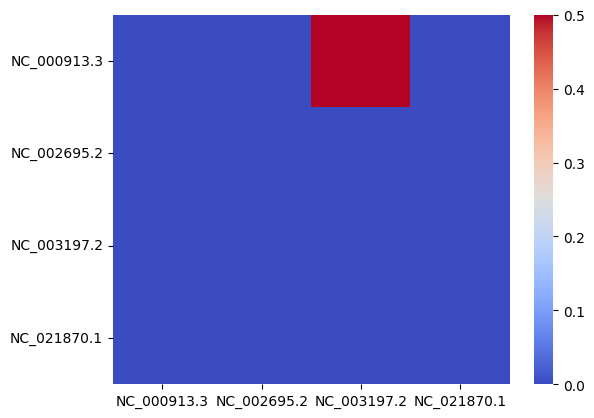

In [21]:
# Get pairwise distances
import pandas as pd
import seaborn as sns 

names = [g.name for g in genomes]
df = pd.DataFrame(data=0, index=names, columns=names)
df.loc['NC_000913.3', 'NC_003197.2'] = 0.5
print(df)
sns.heatmap(df, cmap='coolwarm')



This workshop was developed by Grace Hall and Adam Taranto.